# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2344]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Setting global constants to ensure notebook results are reproducible
N_TREES = 150
DEPTH = 15
RANDOM_STATE = 42
NULL_VALUE_THRESHOLD = 80
UNIQUE_VALUE_THRESHOLD = 15
VRM1 = 0.3
VRM2 = 0.6
VRM3 = 0.1
IQR_RNG = 10

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2345]:
df_train = pd.read_csv("/Users/OmegaSel/Documents/EDSA/Fundamentals/Advanced Regression/Advanced-Regression-Starter-Data/df_train.csv")
df_test = pd.read_csv("/Users/OmegaSel/Documents/EDSA/Fundamentals/Advanced Regression/Advanced-Regression-Starter-Data/df_test.csv")

In [2346]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [2347]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [2348]:
df_train.drop("Unnamed: 0", axis="columns", inplace=True)

In [2349]:
df_train.tail()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,33.333333,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [2350]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [2351]:
df_train[["time", "Valencia_wind_deg", "Seville_pressure", "Valencia_pressure"]].head()

,time,Valencia_wind_deg,Seville_pressure,Valencia_pressure
0,2015-01-01 03:00:00,level_5,sp25,1002.666667
1,2015-01-01 06:00:00,level_10,sp25,1004.333333
2,2015-01-01 09:00:00,level_9,sp25,1005.333333
3,2015-01-01 12:00:00,level_8,sp25,1009.000000
4,2015-01-01 15:00:00,level_7,sp25,NaN


In [2352]:
df_train.Valencia_wind_deg.value_counts()

level_1     1072
level_5      915
level_4      914
level_3      890
level_7      882
level_6      881
level_2      874
level_10     839
level_8      798
level_9      698
Name: Valencia_wind_deg, dtype: int64

In [2353]:
df_train.Seville_pressure.value_counts()

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp16    392
sp22    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64

In [2354]:
df_train["Valencia_pressure"] = df_train["Valencia_pressure"].fillna(df_train["Valencia_pressure"].mean())

In [2355]:
df_train["Valencia_pressure"].head()

0    1002.666667
1    1004.333333
2    1005.333333
3    1009.000000
4    1012.051407
Name: Valencia_pressure, dtype: float64

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [2356]:
# look at data statistics

In [2357]:
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [2358]:
df_train.kurtosis(axis = 0)

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3.821219
Seville_temp_max          -0.515989
Madrid_pressure            2

In [2359]:
df_train.skew(axis = 0)

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.950715
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

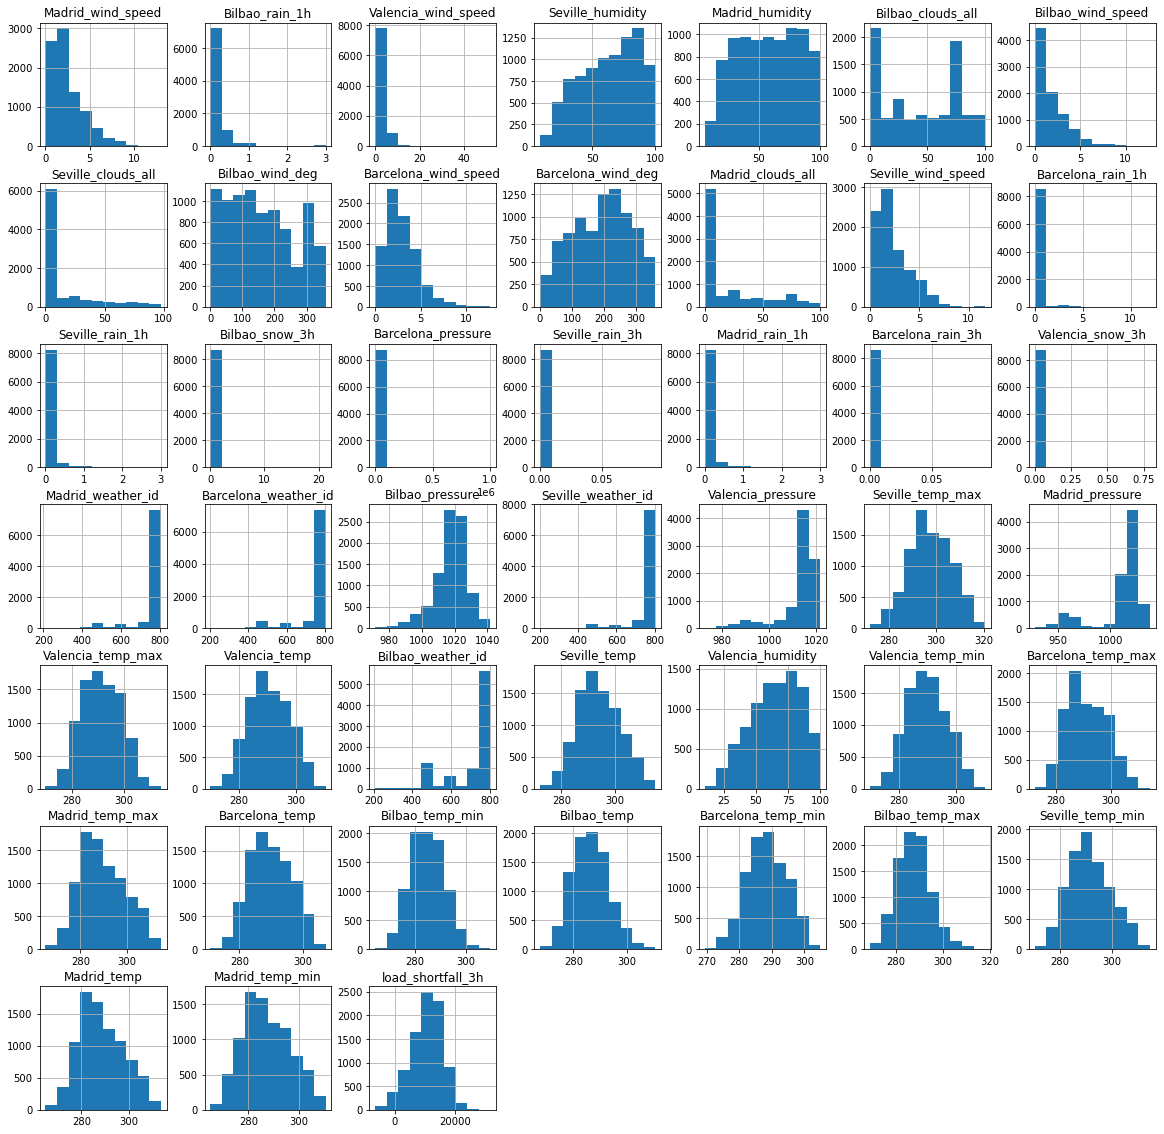

In [2360]:
numerical_features = df_train.describe().columns.to_list()
df_train[numerical_features].hist(figsize = (20,20));

In [2361]:
# Determine IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
IQR

Madrid_wind_speed          2.333333
Bilbao_rain_1h             0.100000
Valencia_wind_speed        2.666667
Seville_humidity          37.666667
Madrid_humidity           42.333333
Bilbao_clouds_all         65.000000
Bilbao_wind_speed          2.000000
Seville_clouds_all        20.000000
Bilbao_wind_deg          160.666667
Barcelona_wind_speed       2.333333
Barcelona_wind_deg       141.833333
Madrid_clouds_all         33.333333
Seville_wind_speed         2.333333
Barcelona_rain_1h          0.000000
Seville_rain_1h            0.000000
Bilbao_snow_3h             0.000000
Barcelona_pressure         8.000000
Seville_rain_3h            0.000000
Madrid_rain_1h             0.000000
Barcelona_rain_3h          0.000000
Valencia_snow_3h           0.000000
Madrid_weather_id          0.666667
Barcelona_weather_id       1.000000
Bilbao_pressure           11.000000
Seville_weather_id         0.000000
Valencia_pressure          5.281927
Seville_temp_max          12.837250
Madrid_pressure            9

In [2362]:
# Outliers outside IQR
((df_train < (Q1 - IQR_RNG * IQR)) | (df_train > (Q3 + IQR_RNG * IQR))).head()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,...,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h,time
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [2363]:
# Number of outliers
((df_train < (Q1 - IQR_RNG * IQR)) | (df_train > (Q3 + IQR_RNG * IQR))).sum();

In [2364]:
(((df_train < (Q1 - IQR_RNG * IQR)) | (df_train > (Q3 + IQR_RNG * IQR))).sum() / df_train.shape[0]) * 100;

In [2365]:
outliers_mask = ((df_train < (Q1 - IQR_RNG * IQR)) | (df_train > (Q3 + IQR_RNG * IQR))) 
df_train[outliers_mask] = np.nan
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [2366]:
# Drop all NULL values
df_train.dropna(inplace = True)

In [2367]:
df_train.kurtosis(axis=0) 

Madrid_wind_speed        3.123532
Bilbao_rain_1h          11.606140
Valencia_wind_speed      5.272685
Seville_humidity        -1.124466
Madrid_humidity         -0.958700
Bilbao_clouds_all       -1.607639
Bilbao_wind_speed        3.697590
Seville_clouds_all      60.803077
Bilbao_wind_deg         -1.069845
Barcelona_wind_speed     0.770035
Barcelona_wind_deg      -0.823664
Madrid_clouds_all        9.451766
Seville_wind_speed       0.932079
Barcelona_rain_1h        0.000000
Seville_rain_1h          0.000000
Bilbao_snow_3h           0.000000
Barcelona_pressure      10.804317
Seville_rain_3h          0.000000
Madrid_rain_1h           0.000000
Barcelona_rain_3h        0.000000
Valencia_snow_3h         0.000000
Madrid_weather_id        7.056172
Barcelona_weather_id     1.166477
Bilbao_pressure          2.421782
Seville_weather_id       0.000000
Valencia_pressure        4.051610
Seville_temp_max        -0.443129
Madrid_pressure          2.909988
Valencia_temp_max       -0.556751
Valencia_temp 

In [2368]:
df_train.shape

(4138, 48)

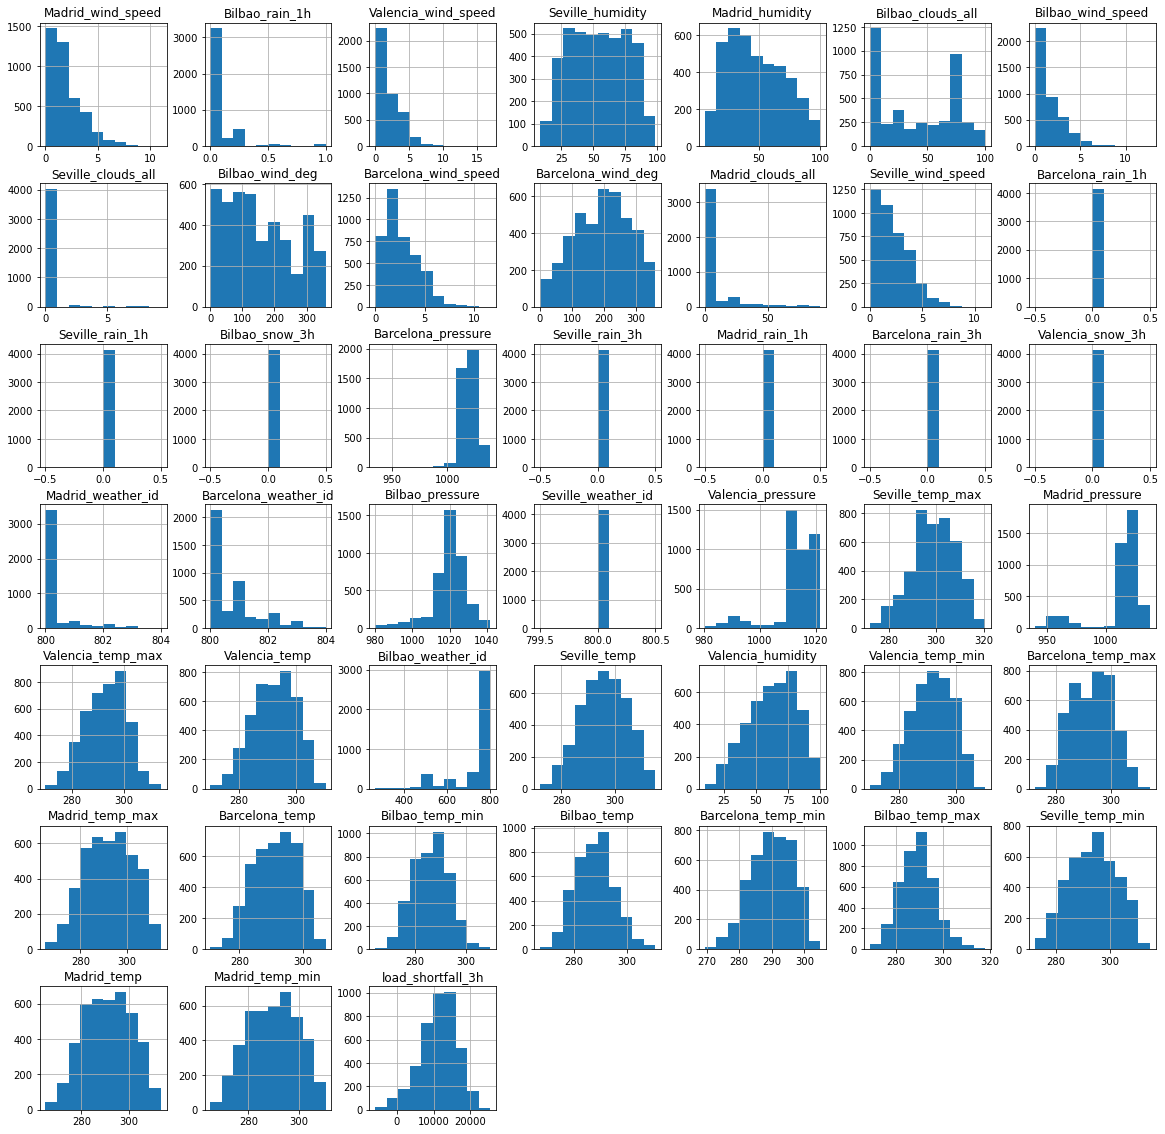

In [2369]:
df_train[numerical_features].hist(figsize = (20,20));

In [2370]:
# plot relevant feature interactions

In [2371]:
# evaluate correlation

In [2372]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [2373]:
# remove missing values/ features

In [2374]:
# create new features

In [2375]:
# Convert time object to datetime
df_train['time'] = pd.to_datetime(df_train['time'])

In [2376]:
# Create dummy variables
df_train = pd.get_dummies(df_train, drop_first = True)

In [2377]:
#target_variable = df_train["load_shortfall_3h"]
#df_train.drop("load_shortfall_3h", axis= 'columns', inplace= True)

In [2378]:
df_train.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,1,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,1,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,1,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,1,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,1,0,0,0,0,0,0,0


In [2379]:
# Move time to index
#df_train_date_index = df_train.sort_values('time').set_index('time')

In [2380]:
def to_integer(dt_time):
    return 1000000*dt_time.year + 10000*dt_time.month + 100*dt_time.day + dt_time.hour


In [2381]:
# Covert time to numeric
df_train["time_numeric"] = to_integer(df_train["time"].dt)
df_train.drop("time", axis= 'columns', inplace= True)

In [2382]:
target_variable = df_train["load_shortfall_3h"]
df_train.drop("load_shortfall_3h", axis= 'columns', inplace= True)

In [2383]:
df_train.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_numeric
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,1,0,0,0,0,0,0,0,2015010103
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,1,0,0,0,0,0,0,0,2015010106
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,1,0,0,0,0,0,0,0,2015010109
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,1,0,0,0,0,0,0,0,2015010112
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,1,0,0,0,0,0,0,0,2015010115


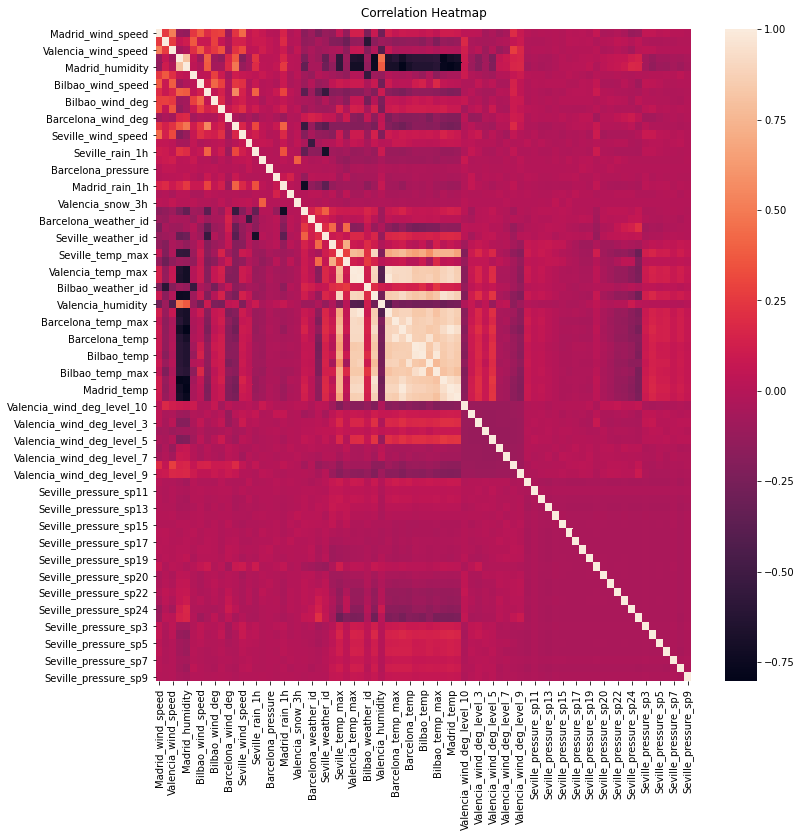

In [2384]:
fig, ax = plt.subplots(figsize = (12,12))
heatmap = sns.heatmap(df_train_date_index.corr(), ax = ax)#, vmin=-1, vmax=1, annot=True,figsize = (10,10))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [2385]:
# engineer existing features
def drop_columns(input_df, threshold, unique_value_threshold):
    # your code here
    
    column_names = input_df.columns
    
    for col in column_names:
        thresh_calc = input_df[col].isnull().sum() / input_df.shape[0] * 100
        uvt = len(input_df[col].unique().tolist()) / input_df.shape[0] * 100
        if thresh_calc > threshold:
            input_df = input_df.drop(col, axis=1)
        elif uvt < unique_value_threshold:
            input_df = input_df.drop(col, axis=1)
           
    return input_df

In [2386]:
#df_train = drop_columns(df_train, NULL_VALUE_THRESHOLD, UNIQUE_VALUE_THRESHOLD)

In [2387]:
df_train.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_numeric
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,1,0,0,0,0,0,0,0,2015010103
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,1,0,0,0,0,0,0,0,2015010106
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,1,0,0,0,0,0,0,0,2015010109
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,1,0,0,0,0,0,0,0,2015010112
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,1,0,0,0,0,0,0,0,2015010115


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [2388]:
X = df_train #df_train_date_index
y = target_variable

In [2389]:
# set up scaler
x_scaler = StandardScaler()
#y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(X)
#y_scaled = y_scaler.fit_transform(y[:,np.newaxis])


In [2390]:
# split data
# Set test data size to 20%
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=RANDOM_STATE)

In [2391]:
# create targets and features dataset

In [2392]:
# create one or more ML models

In [2393]:
# Lasso regression model
# Instantiate
lasso = Lasso()

# Train
lasso.fit(x_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(x_train)))
train_r2 = r2_score(y_train, lasso.predict(x_train))

# Predict
y_lasso_pred = lasso.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))
test_r2 = r2_score(y_test, y_lasso_pred)


In [2394]:
print("Lasso regression model: ")
print('Train RMSE:', train_rmse)
print('Train R2:', train_r2)
print('Test RMSE:', test_rmse)
print('Test R2:', test_r2)

Lasso regression model: 
Train RMSE: 4494.444129006149
Train R2: 0.19922906720720512
Test RMSE: 4668.8310626281045
Test R2: 0.16847846157656832


In [2395]:
# Random Forest regression model
# Instantiate
RF = RandomForestRegressor(n_estimators= N_TREES, max_depth= DEPTH)

# Train
RF.fit(x_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train, RF.predict(x_train)))
train_r2 = r2_score(y_train, RF.predict(x_train))

# Predict
y_rf_pred = RF.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
test_r2 = r2_score(y_test, y_rf_pred)


In [2396]:
print("Random Forest regression model: ")
print('Train RMSE:', train_rmse)
print('Train R2:', train_r2)
print('Test RMSE:', test_rmse)
print('Test R2:', test_r2)

Random Forest regression model: 
Train RMSE: 1608.8326344373786
Train R2: 0.8973927466029191
Test RMSE: 3738.0632269530206
Test R2: 0.4669714521913717


In [2397]:
# Support vector regression model
# Instantiate
sv_reg = SVR(kernel='rbf', gamma='auto')

# Train
sv_reg.fit(x_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train, sv_reg.predict(x_train)))
train_r2 = r2_score(y_train, sv_reg.predict(x_train))

# Predict
y_sv_pred = sv_reg.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_sv_pred))
test_r2 = r2_score(y_test, y_sv_pred)


In [2398]:
print("Support Vector regression model: ")
print('Train RMSE:', train_rmse)
print('Train R2:', train_r2)
print('Test RMSE:', test_rmse)
print('Test R2:', test_r2)

Support Vector regression model: 
Train RMSE: 5033.094900902039
Train R2: -0.004214682274448434
Test RMSE: 5133.998604442926
Test R2: -0.005468979098478544


In [2399]:
# Voting Regressor ensemble

# Instantiate
models = [("Lasso", lasso), ("RF", RF), ("SVR", sv_reg)]
model_weights = np.array([VRM1, VRM2, VRM3])
v_reg = VotingRegressor(estimators=models, weights=model_weights)

# Train
v_reg.fit(x_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train, v_reg.predict(x_train)))
train_r2 = r2_score(y_train, v_reg.predict(x_train))

# Predict
y_vr_pred = v_reg.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_vr_pred))
test_r2 = r2_score(y_test, y_vr_pred)


In [2400]:
print("Voting Regressor regression model: ")
print('Train RMSE:', train_rmse)
print('Train R2:', train_r2)
print('Test RMSE:', test_rmse)
print('Test R2:', test_r2)

Voting Regressor regression model: 
Train RMSE: 2685.3804493195707
Train R2: 0.7141304001682793
Test RMSE: 3989.201965809491
Test R2: 0.39294333398450765


In [2401]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [2402]:
# Compare model performance

In [2403]:
df_train.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_numeric
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,1,0,0,0,0,0,0,0,2015010103
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,1,0,0,0,0,0,0,0,2015010106
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,1,0,0,0,0,0,0,0,2015010109
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,1,0,0,0,0,0,0,0,2015010112
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,1,0,0,0,0,0,0,0,2015010115


In [2404]:
df_test.drop("Unnamed: 0", axis= 'columns', inplace= True)

In [2405]:
# Convert time object to datetime
df_test['time'] = pd.to_datetime(df_test['time'])
df_test_time = df_test['time']
# Create dummy variables
df_test = pd.get_dummies(df_test, drop_first = True)

In [2406]:
df_test.shape

(2920, 78)

In [2407]:
# Covert time to numeric
df_test["time_numeric"] = to_integer(df_test["time"].dt)
df_test.drop("time", axis= 'columns', inplace= True)
#df_test.dropna(inplace= True)

In [2408]:
df_test.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_numeric
0,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,...,0,1,0,0,0,0,0,0,0,2018010100
1,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,...,0,1,0,0,0,0,0,0,0,2018010103
2,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,...,0,1,0,0,0,0,0,0,0,2018010106
3,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,...,0,1,0,0,0,0,0,0,0,2018010109
4,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,...,0,1,0,0,0,0,0,0,0,2018010112


In [2411]:
df_test["Valencia_pressure"] = df_test["Valencia_pressure"].fillna(df_test["Valencia_pressure"].mean())

In [2418]:
# Kaggle
final_model = v_reg
df_test_s = StandardScaler().fit_transform(df_test)
predictions = final_model.predict(df_test_s)
df_predictions = pd.DataFrame(predictions)
df_predictions

,0
0,9656.731160
1,9292.191763
2,9046.748583
3,9147.546912
4,9585.746299
...,...
2915,12448.180245
2916,11423.576780
2917,13088.662942
2918,14301.771540


In [2419]:
df_predictions['time'] = df_test_time

In [2420]:
df_predictions.columns = ["load_shortfall_3h", "time"]

In [2421]:
df_predictions = df_predictions[["time", "load_shortfall_3h"]]

In [2422]:
file_name = "selby_submission_00.csv"
df_predictions.to_csv(file_name)
df_predictions.to_csv(file_name, index = False) 

In [2423]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic